In [2]:
import os
from subprocess import PIPE, run
import time
import pandas as pd
import numpy as np 

Data = pd.read_csv('/Users/sergiomares/Desktop/Nunez/Jin file/TSS_CpG_crispriphenotype_table.txt', delimiter = '\t',header = 0)
Data


b = []

start = time.time()
import subprocess

start = time.time()
b= []

for i in range (10):
    data = run(['curl', ('http://togows.org/api/ucsc/hg19/'+ str(Data['chromosome'][i])+':'+str(int(Data["Primary TSS, 5'"][i]-1000))+'-'+str(Data["Primary TSS, 5'"][i]+1000)+'.fasta/')], stdout=PIPE, stderr=PIPE, universal_newlines=True).stdout[:].replace('\n','')    
    b.append(data)
    if i % 1000 == 0: print(i)
    
end = time.time()
end - start
#It took 106 minutes to comlpete all the sequences for 2.5 kb 

0


['>hg19:chr19:58857938-58859938TAGCCAGACGTGGCGATGCATGCCCAGGCTCCCAGCTACTTGGGAGGCTGAGGCAGGAGGATCGCTTGAGCCTGGGAGGTCAAAACTGCAGTGAGCCGGACTGCAACACTGCACTCCAGCCTGGGTGACAGTGTGAGACCCTGTCTCAAAAAAGAAAAAAGAAAAGAAAACTGTGCTCTTAAGAGCCAGTTCTCCACTCCTCTACCTCAGGAGCCACCCCAGAACCCATCCACTTTGAGGACACGAGATCCCAGCCCACTCAGCCCTGGGAGTCCAAAGACATTTTAAACAGAGCCTCTCTTCACATTTATTAATTCCTGGGAGGAATGAGGGAGGCTTCTCCAGCCCCCCAGAGACCCCGGCCTTGTGCTGCAACAGGAGGGGAGGGAGCCAGTCCAGAATCCCCGGCACTTCTGAGGACACCAACAGCACCCTGGGCCCGCGGCTGCATCAGCTTTCTAGACAACGGGAGAAAAGAGAAATGGTGGAGGAGGGGAAATCCTATGCCCTCCTCCTCGCGGAAATCAAGGCCGACCTCCCTGACGCCCCCCCGGAAGGAAGCGCGTGGTCGGCTGCCAGCCGAGACCCCCATCTGCGCCTCCAGCTGCAGGGCCTTTGCTGGGCGGTTCCTCGCCCGCAATTCCCCCACGAGCCCTGGGGAGACCCAGCGCTAACCAGGGGTGCCCAAGGGAGGAGCCGGGAGAGGCCCTCCTGGAGGTGGGCACAGCCCAGGCAAACATCAGCAGACGGAACCAGCACCCGGGACCCAGGGAAACGTCACCTGCCACCAGGAGCTCCACAGGGTCGCTGAGCTCCGATTCGAAGGTGTGGGGCACCCAGGAGCGGTAGCGGCACCTGTAGTTGCCGGCGTGCTGGGGCCCCACGAAGATCAGCTCGAGGTTCGCCGCGGCCCCGGGGGTGCGGACCGTCTTCACGGCCTTCGTCTCGCCCTCGCGCAGCAGCTCGAAG

In [ ]:


nucleotides = []

for p in range(1):
    for i in list(perm):
            for x in range(10):
                temp = '%s%s' % (x, i)
                nucleotides.append(temp)
    for z in range(20883):
            for h in list(nucleotides):
                Promoter_sequences[0][z] = Promoter_sequences[0][z].replace(h,str((h[0],h[1])))
            if z % 1000 == 0:
                print(z)

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Data = pd.read_csv('/Users/sergiomares/The_table.txt',sep = ' ',  header = None)
Cpg_Islands = pd.read_csv('/Users/sergiomares/Enero162022/coordiantes.txt', header = 0, sep= '\t' )

from math import sqrt

Data.columns = ['Gene','CRISPRoff_average','mutant_average','NaN','Sequence']

for i in range(len(Data)):

    if Data['mutant_average'][i] > Data['CRISPRoff_average'][i]:
        Data.at[i, 'Phe_sco_pos_neg'] =  int(1)
        Data.at[i,'Strength'] =  sqrt(abs(Data['mutant_average'][i] - Data['CRISPRoff_average'][i])) 

    elif Data['mutant_average'][i] < Data['CRISPRoff_average'][i]:
        Data.at[i, 'Phe_sco_pos_neg'] = int(0)
        Data.at[i,'Strength'] = 0
    else:
        Data.at[i, 'Strength'] = 'Same'

from tensorflow.keras import backend as K
K.clear_session()


In [126]:
Data['CpG'] = 0

for i in range(18694):
    if Cpg_Islands['CpG'].loc[Cpg_Islands['gene'] == Data['Gene'][i]].iloc[0] == 'VERDADERO':
        Data['CpG'][i] = 1
        #print(1)
    else:
        Data['CpG'][i] = 0
        #print(0)

/var/folders/pj/0dd0rqzj219164nwyh4f2l580000gn/T/ipykernel_1639/1352674810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['CpG'][i] = 0
/var/folders/pj/0dd0rqzj219164nwyh4f2l580000gn/T/ipykernel_1639/1352674810.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['CpG'][i] = 1


(-0.8, 0.2, -0.8, 0.2)

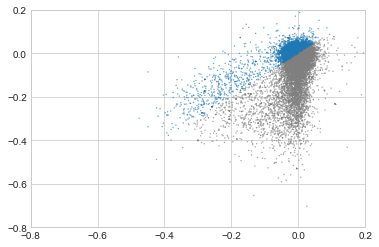

In [17]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

colors = {1:'tab:grey', 0:'tab:blue'}

plt.scatter(Data['mutant_average'], Data['CRISPRoff_average'], c = Data['Phe_sco_pos_neg'].map(colors)
         , s = 0.1)
         
plt.axis([-0.8,0.2,-0.8,0.2])


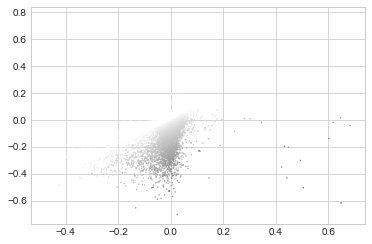

In [306]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

colors = {1:'tab:grey', 0:'tab:blue','Same':'tab:red'}

plt.scatter(Data['mutant_average'], Data['CRISPRoff_average'], c = Data['Strength']
         , s = 0.1)

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

sequences = Data['Sequence'][:]

 # This removes empty sequences.

# The LabelEncoder encodes a sequence of bases as a sequence of integers.
integer_encoder = LabelEncoder()  
# The OneHotEncoder converts an array of integers to a sparse matrix where 
# each row corresponds to one possible value of each feature.
one_hot_encoder = OneHotEncoder(categories='auto')   
input_features = []

counter = 0 
for sequence in sequences:
    integer_encoded = integer_encoder.fit_transform(list(sequence))
    integer_encoded = np.array(integer_encoded).reshape(-1, 1)
    one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
    input_features.append(one_hot_encoded.toarray())

np.set_printoptions(threshold=40)
input_features = np.stack(input_features)
print("Example sequence\n-----------------------")
print('DNA Sequence #1:\n',sequences[0][:10],'...',sequences[0][-10:])
print('One hot encoding of Sequence #1:\n',input_features[0].T)

Example sequence
-----------------------
DNA Sequence #1:
 AAATATATTT ... GAATAACTCT
One hot encoding of Sequence #1:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 1.]]


In [730]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    input_features, Data[['mutant_average','CRISPRoff_average']], test_size=0.25, random_state=42)

In [1808]:
# for layer in model.layers:
#     if "BatchNormalization" in layer.__class__.__name__:
#         layer.trainable=False
#         print(layer.weights)

from tensorflow.keras.layers import Conv2D ,Dense, MaxPooling1D, Flatten, Activation, Conv1D, Dropout, MaxPool1D, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

model_in = Input(shape=(train_features[1].shape))
model = (Conv1D(filters = 15, kernel_size = 5))(model_in)

model1 = (Conv1D(filters = 15, kernel_size = 2))(model)
model1 = (MaxPooling1D(pool_size=(7)))(model1)
model1 =(Dense(14, activation='LeakyReLU'))(model1)
model1 = GlobalMaxPool1D()(model1)
model1 = (Dense(1, activation='LeakyReLU'))(model1)

model2 = (Conv1D(filters = 15, kernel_size = 2))(model)
model2 = (MaxPooling1D(pool_size=(7)))(model2)
model2 =(Dense(14, activation='LeakyReLU'))(model2)
model2 = GlobalMaxPool1D()(model2)
model2 = (Dense(1, activation='LeakyReLU'))(model2)

model = Model(model_in, [model1,model2])
model.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=['accuracy'])
model.summary()

(372.2469250237855, 347.75323975953506)


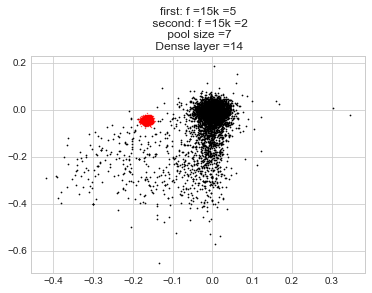

<Figure size 432x288 with 0 Axes>

In [1819]:
#hyp = [29, 19, 2, 39, 15, 3]
hyp = [15, 5, 15, 2, 7, 14]

model_to_test = run_model(build_model(hyp))

print(average_percentage_error(model_to_test))

plt.title('first: f ='+str(hyp[0])+'k ='+ str(hyp[1]) + '\n second: f ='+ str(hyp[2]) + 'k =' + str(hyp[3]) +
         '\n pool size =' + str(hyp[4]) + '\n Dense layer =' + str(hyp[5]))
plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.5)
plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
plt.figure()
plt.show()

(462.66348974070394, 388.18271325244467)


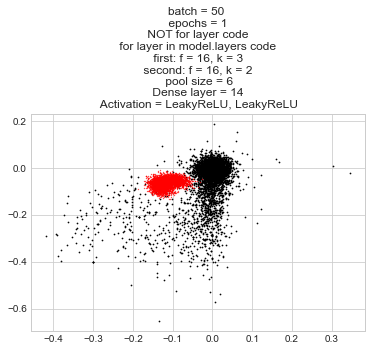

<Figure size 432x288 with 0 Axes>

In [1328]:
histories = model.fit(train_features, [train_labels['mutant_average'], train_labels['CRISPRoff_average']], batch_size=50, verbose=0, validation_split=0.25)

predicted = model.predict(test_features)

print(average_percentage_error(predicted))

plt.title('batch = 50 \n epochs = 1 \n NOT for layer code \n for layer in model.layers code \n first: f = 16, k = 3 \n second: f = 16, k = 2 \n pool size = 6\n Dense layer = 14 \n Activation = LeakyReLU, LeakyReLU')
plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.5)
plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
plt.figure()
plt.show()

The percentage error for the mutant_average is: 340.2168965886856 % 
 The percentage error for the CRISPRoff_average is: 187.9517745930661 %
None


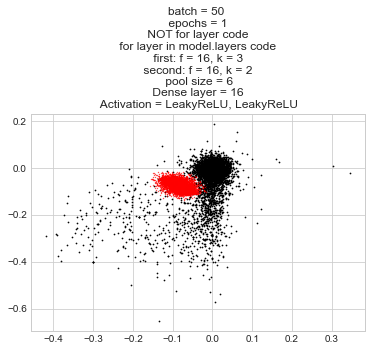

<Figure size 432x288 with 0 Axes>

In [838]:
histories = model.fit(train_features, [train_labels['mutant_average'], train_labels['CRISPRoff_average']], batch_size=50, verbose=0, validation_split=0.25)

predicted = model.predict(test_features)

print(average_percentage_error(test_labels))

plt.title('batch = 50 \n epochs = 1 \n NOT for layer code \n for layer in model.layers code \n first: f = 16, k = 3 \n second: f = 16, k = 2 \n pool size = 6\n Dense layer = 10 \n Activation = LeakyReLU, LeakyReLU')
plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.5)
plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
plt.figure()
plt.show()

The percentage error for the mutant_average is: 206.55633583922474 % 
 The percentage error for the CRISPRoff_average is: -8.27855576247062 %
None


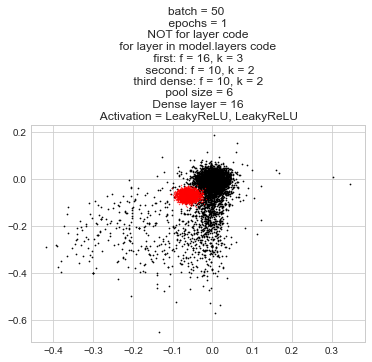

<Figure size 432x288 with 0 Axes>

In [826]:
histories = model.fit(train_features, [train_labels['mutant_average'], train_labels['CRISPRoff_average']], batch_size=50, verbose=0, validation_split=0.25)

predicted = model.predict(test_features)

print(average_percentage_error(test_labels))

plt.title('batch = 50 \n epochs = 1 \n NOT for layer code \n for layer in model.layers code \n first: f = 16, k = 3 \n second: f = 10, k = 2\n third dense: f = 10, k = 2 \n pool size = 6\n Dense layer = 16 \n Activation = LeakyReLU, LeakyReLU')
plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.5)
plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
plt.figure()
plt.show()

The percentage error for the mutant_average is: 206.55633583922474 % 
 The percentage error for the CRISPRoff_average is: -8.27855576247062 %
None


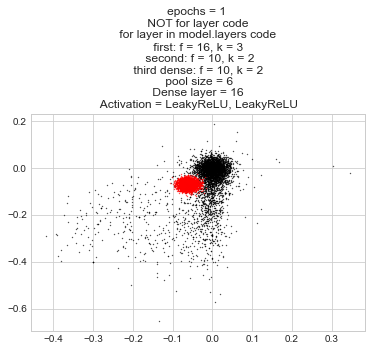

<Figure size 432x288 with 0 Axes>

In [824]:
histories = model.fit(train_features, [train_labels['mutant_average'], train_labels['CRISPRoff_average']], batch_size=10, verbose=0, validation_split=0.25)

predicted = model.predict(test_features)

print(average_percentage_error(test_labels))

plt.title('epochs = 1 \n NOT for layer code \n for layer in model.layers code \n first: f = 16, k = 3 \n second: f = 10, k = 2\n third dense: f = 10, k = 2 \n pool size = 6\n Dense layer = 16 \n Activation = LeakyReLU, LeakyReLU')
plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.1)
plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
plt.figure()
plt.show()

The percentage error for the mutant_average is: 575.173434457294 % 
 The percentage error for the CRISPRoff_average is: 492.49962875829993 %
None


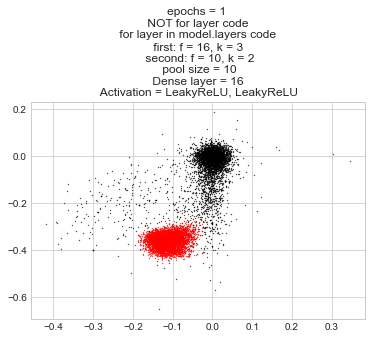

<Figure size 432x288 with 0 Axes>

In [815]:
histories = model.fit(train_features, [train_labels['mutant_average'], train_labels['CRISPRoff_average']], batch_size=10, verbose=0, validation_split=0.25)

predicted = model.predict(test_features)

print(average_percentage_error(test_labels))

plt.title('epochs = 1 \n NOT for layer code \n for layer in model.layers code \n first: f = 16, k = 3 \n second: f = 10, k = 2\n pool size = 10\n Dense layer = 16 \n Activation = LeakyReLU, LeakyReLU')
plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.1)
plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
plt.figure()
plt.show()

(340.2168965886856, 187.9517745930661)
(340.2168965886856, 187.9517745930661)


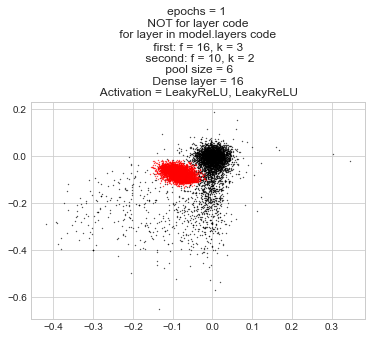

<Figure size 432x288 with 0 Axes>

In [1149]:
histories = model.fit(train_features, [train_labels['mutant_average'], train_labels['CRISPRoff_average']], batch_size=10, verbose=0, validation_split=0.25)

predicted = model.predict(test_features)

print(average_percentage_error(test_labels))

plt.title('epochs = 1 \n NOT for layer code \n for layer in model.layers code \n first: f = 16, k = 3 \n second: f = 10, k = 2\n pool size = 6\n Dense layer = 16 \n Activation = LeakyReLU, LeakyReLU')
plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.1)
plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
plt.figure()
plt.show()

The percentage error for the mutant_average is: 529.7624398508949 % 
 The percentage error for the CRISPRoff_average is: 457.0635939446278 %
None


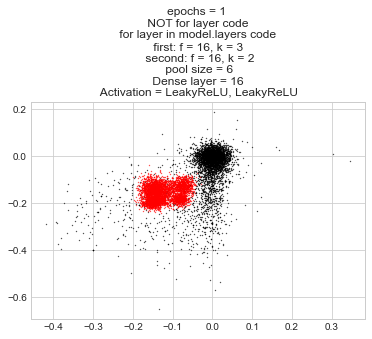

<Figure size 432x288 with 0 Axes>

In [789]:
histories = model.fit(train_features, [train_labels['mutant_average'], train_labels['CRISPRoff_average']], batch_size=10, verbose=0, validation_split=0.25)

predicted = model.predict(test_features)

print(average_percentage_error(test_labels))

plt.title('epochs = 1 \n NOT for layer code \n for layer in model.layers code \n first: f = 16, k = 3 \n second: f = 16, k = 2\n pool size = 6\n Dense layer = 16 \n Activation = LeakyReLU, LeakyReLU')
plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.1)
plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
plt.figure()
plt.show()

The percentage error for the mutant_average is: 290.4399879823908 % 
 The percentage error for the CRISPRoff_average is: 113.1620695088989 %
None


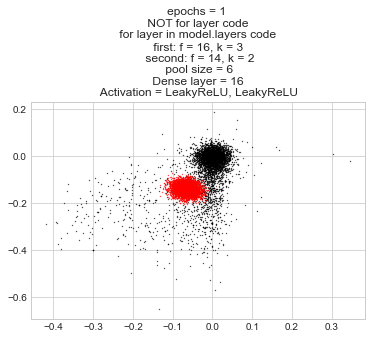

<Figure size 432x288 with 0 Axes>

In [787]:
plt.title('epochs = 1 \n NOT for layer code \n for layer in model.layers code \n first: f = 16, k = 3 \n second: f = 16, k = 2\n pool size = 6\n Dense layer = 16 \n Activation = LeakyReLU, LeakyReLU')
plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.1)
plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
plt.figure()
plt.show()

The percentage error for the mutant_average is: 4003.7674300512303 % 
 The percentage error for the CRISPRoff_average is: 3872.8047542582312 %
None


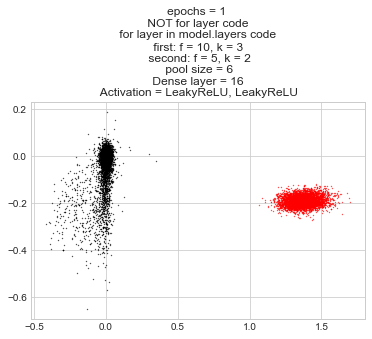

<Figure size 432x288 with 0 Axes>

In [784]:
plt.title('epochs = 1 \n NOT for layer code \n for layer in model.layers code \n first: f = 10, k = 3 \n second: f = 5, k = 2\n pool size = 6\n Dense layer = 16 \n Activation = LeakyReLU, LeakyReLU')
plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.1)
plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
plt.figure()
plt.show()

The percentage error for the mutant_average is: 249.03739975276184 % 
 The percentage error for the CRISPRoff_average is: 62.67159748927542 %
None


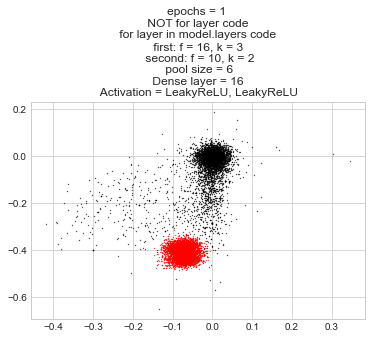

<Figure size 432x288 with 0 Axes>

In [782]:
plt.title('epochs = 1 \n NOT for layer code \n for layer in model.layers code \n first: f = 16, k = 3 \n second: f = 10, k = 2\n pool size = 6\n Dense layer = 16 \n Activation = LeakyReLU, LeakyReLU')
plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.1)
plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
plt.figure()
plt.show()

The percentage error for the mutant_average is: 365.93376800749894 % 
 The percentage error for the CRISPRoff_average is: 286.51735545013685 %
None


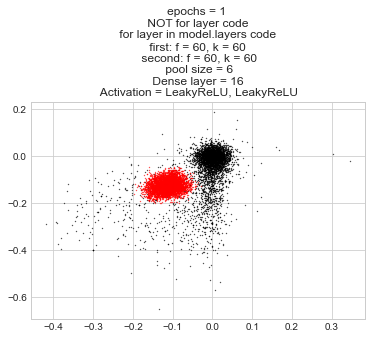

<Figure size 432x288 with 0 Axes>

In [780]:
plt.title('epochs = 1 \n NOT for layer code \n for layer in model.layers code \n first: f = 32, k = 4 \n second: f = 10, k = 3\n pool size = 6\n Dense layer = 16 \n Activation = LeakyReLU, LeakyReLU')
plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.1)
plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
plt.figure()
plt.show()

The percentage error for the mutant_average is: 596.0314576220478 % 
 The percentage error for the CRISPRoff_average is: 582.1419906760651 %
None


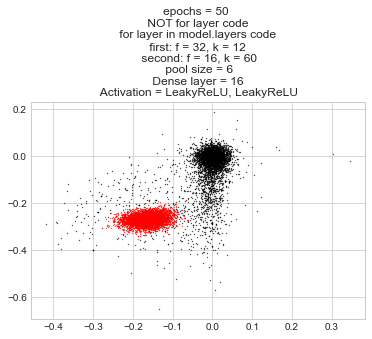

<Figure size 432x288 with 0 Axes>

In [775]:
histories = model.fit(train_features, [train_labels['mutant_average'], train_labels['CRISPRoff_average']], batch_size=10, verbose=0, validation_split=0.25)

predicted = model.predict(test_features)

print(average_percentage_error(test_labels))

plt.title('epochs = 50 \n NOT for layer code \n for layer in model.layers code \n first: f = 32, k = 12 \n second: f = 16, k = 60\n pool size = 6\n Dense layer = 16 \n Activation = LeakyReLU, LeakyReLU')
plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.1)
plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
plt.figure()
plt.show()

The percentage error for the mutant_average is: 1443.0143425535268 % 
 The percentage error for the CRISPRoff_average is: 1573.1767092436362 %
None


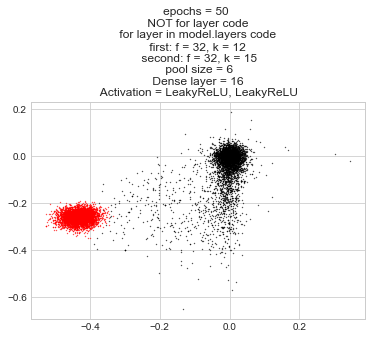

<Figure size 432x288 with 0 Axes>

In [768]:
histories = model.fit(train_features, [train_labels['mutant_average'], train_labels['CRISPRoff_average']], batch_size=10, verbose=0, validation_split=0.25)

predicted = model.predict(test_features)

print(average_percentage_error(test_labels))

plt.title('epochs = 50 \n NOT for layer code \n for layer in model.layers code \n first: f = 32, k = 12 \n second: f = 32, k = 15\n pool size = 6\n Dense layer = 16 \n Activation = LeakyReLU, LeakyReLU')
plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.1)
plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
plt.figure()
plt.show()

The percentage error for the mutant_average is: 956.82175235392 % 
 The percentage error for the CRISPRoff_average is: 1074.4386429205426 %
None


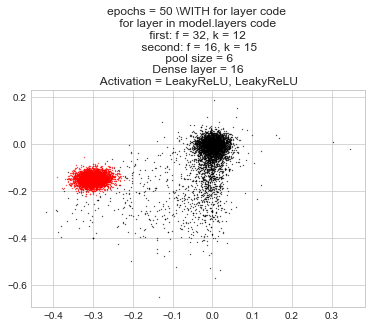

<Figure size 432x288 with 0 Axes>

In [764]:
histories = model.fit(train_features, [train_labels['mutant_average'], train_labels['CRISPRoff_average']], batch_size=10, verbose=0, validation_split=0.25)

predicted = model.predict(test_features)

print(average_percentage_error(test_labels))

plt.title('epochs = 50 \WITH for layer code \n for layer in model.layers code \n first: f = 32, k = 12 \n second: f = 16, k = 15\n pool size = 6\n Dense layer = 16 \n Activation = LeakyReLU, LeakyReLU')
plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.1)
plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
plt.figure()
plt.show()

578.4113770477167 582.9746385456609
None


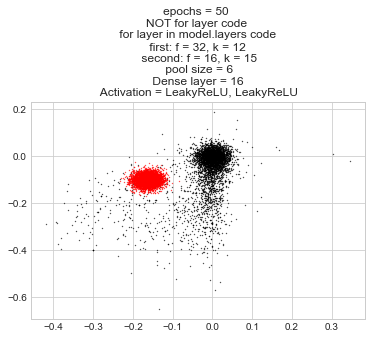

<Figure size 432x288 with 0 Axes>

In [757]:
plt.title('epochs = 50 \nNOT for layer code \n for layer in model.layers code \n first: f = 32, k = 12 \n second: f = 16, k = 15\n pool size = 6\n Dense layer = 16 \n Activation = LeakyReLU, LeakyReLU')
plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.1)
plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
plt.figure()
plt.show()



In [752]:
test_labels['mutant_average'][1], predicted_values[0][1]

(-0.005277633, -0.18920715)

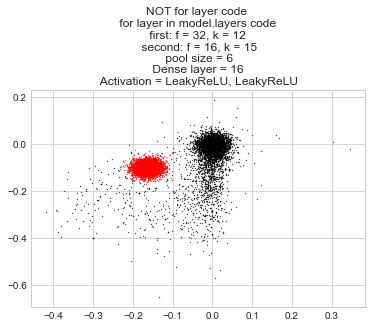

<Figure size 432x288 with 0 Axes>

In [700]:
plt.title('NOT for layer code \n for layer in model.layers code \n first: f = 32, k = 12 \n second: f = 16, k = 15\n pool size = 6\n Dense layer = 16 \n Activation = LeakyReLU, LeakyReLU')
plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.1)
plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
plt.figure()
plt.show()

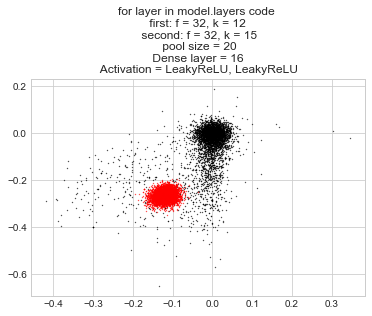

<Figure size 432x288 with 0 Axes>

In [681]:
plt.title('for layer in model.layers code \n first: f = 32, k = 12 \n second: f = 32, k = 15\n pool size = 20\n Dense layer = 16 \n Activation = LeakyReLU, LeakyReLU')
plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.1)
plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
plt.figure()
plt.show()

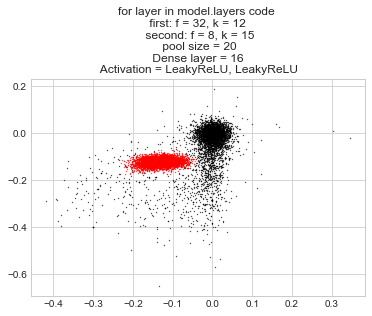

<Figure size 432x288 with 0 Axes>

In [679]:
histories = model.fit(train_features, [train_labels['mutant_average'], train_labels['CRISPRoff_average']],batch_size=10, verbose=0, validation_split=0.25)

predicted = model.predict(test_features)

plt.title('for layer in model.layers code \n first: f = 32, k = 12 \n second: f = 8, k = 15\n pool size = 20\n Dense layer = 16 \n Activation = LeakyReLU, LeakyReLU')
plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.1)
plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
plt.figure()
plt.show()

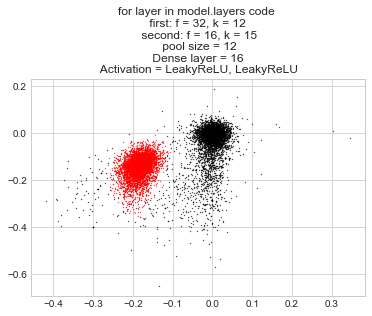

<Figure size 432x288 with 0 Axes>

In [676]:
plt.title('for layer in model.layers code \n first: f = 32, k = 12 \n second: f = 16, k = 15\n pool size = 12\n Dense layer = 16 \n Activation = LeakyReLU, LeakyReLU')
plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.1)
plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
plt.figure()
plt.show()

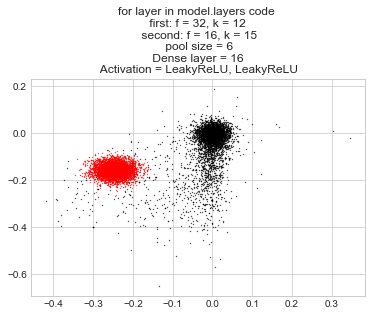

<Figure size 432x288 with 0 Axes>

In [674]:
plt.title('for layer in model.layers code \n first: f = 32, k = 12 \n second: f = 16, k = 15\n pool size = 6\n Dense layer = 16 \n Activation = LeakyReLU, LeakyReLU')
plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.1)
plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
plt.figure()
plt.show()

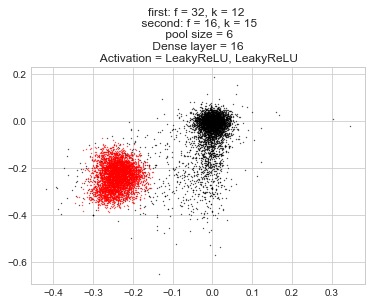

<Figure size 432x288 with 0 Axes>

In [668]:
plt.title('first: f = 32, k = 12 \n second: f = 16, k = 15\n pool size = 6\n Dense layer = 16 \n Activation = LeakyReLU, LeakyReLU')
plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.1)
plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
plt.figure()
plt.show()

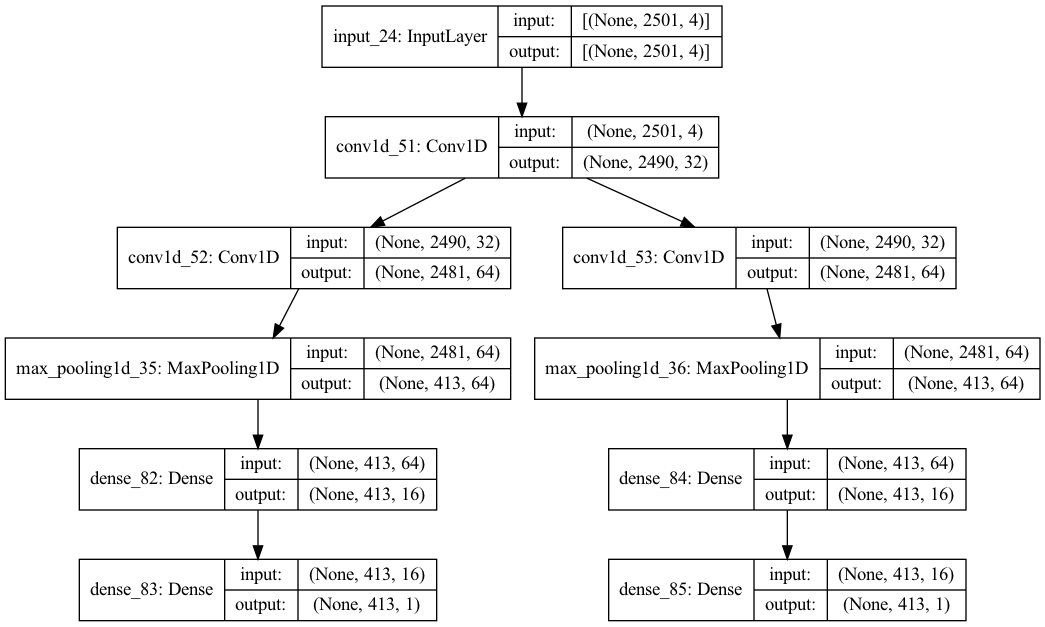

In [398]:
from keras.utils.vis_utils import plot_model
import pydot

plot_model(model, to_file='model.png', show_shapes=True,show_layer_names=True)

In [1817]:


def build_model(list):
    model_in = Input(shape=(train_features[1].shape))
    model = (Conv1D(filters = list[0], kernel_size = list[1], padding = 'same'))(model_in)

    model1 = (Conv1D(filters = list[2], kernel_size = list[3], padding = 'same'))(model)
    model1 = (MaxPooling1D(pool_size=(list[4])))(model1)
    model1 =(Dense(list[5], activation='LeakyReLU'))(model1)
    model1 = GlobalMaxPool1D()(model1)
    model1 = (Dense(1, activation='LeakyReLU'))(model1)

    model2 = (Conv1D(filters = list[2], kernel_size = list[3], padding = 'same'))(model)
    model2 = (MaxPooling1D(pool_size=(list[4])))(model2)
    model2 =(Dense(list[5], activation='LeakyReLU'))(model2)
    model2 = GlobalMaxPool1D()(model2)
    model2 = (Dense(1, activation='LeakyReLU'))(model2)

    model = Model(model_in, [model1,model2])
    model.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

    return model

def run_model(model):
    tf.random.set_seed(2)
    model.fit(train_features, [train_labels['mutant_average'], train_labels['CRISPRoff_average']], batch_size=50, verbose=0, validation_split=0.35)
    predicted = model.predict(test_features)

    return(predicted)


def average_percentage_error(predicted):

    predicted_values[0], predicted_values[1] = pd.DataFrame(predicted[0]), pd.DataFrame(predicted[1])

    values = (0, 0)

    for i in range(4674):
        temp = abs(test_labels['mutant_average'][i] - predicted_values[0][i])/test_labels['mutant_average'][i] * 100
        temp2 = abs(test_labels['CRISPRoff_average'][i] - predicted_values[0][i])/test_labels['mutant_average'][i] * 100
        values = values[0] + temp, values[1] + temp2
    
    values =  values[0]/4674, values[1]/4674

    return values


def good_parameter(evaluation, previous_evaluation, parameter_list, index_of_parameter, best_list):

    if evaluation[0] < previous_evaluation[0] and evaluation[1] < previous_evaluation[1]:
        best_list = parameter_list
        if index_of_parameter < 5:
            index_of_parameter = index_of_parameter + 1
        else:
            index_of_parameter = 0 
        parameter_list[index_of_parameter] = parameter_list[index_of_parameter] + 1
        return(parameter_list, index_of_parameter, evaluation, best_list)
    else:
        parameter_list[index_of_parameter] = parameter_list[index_of_parameter] - 1
        if index_of_parameter < 5:
            index_of_parameter = index_of_parameter + 1
        else:
            index_of_parameter = 0 
        parameter_list[index_of_parameter] = parameter_list[index_of_parameter] + 1
        return(best_list, index_of_parameter, evaluation, best_list)

In [1816]:
model_values = []
model_value = []

#THIS ONE IS DONE WITH THE SIGMOID BEFORE THE LEAKYRELU

#hp = [2, 1, 2, 3, 2, 3]
hp = [1,1,1,1,1,1]
pe = (1000, 1000)
bl = hp

for so_many_models in range(1000):
    
    for each_parameters in range(6): # for each parameter
    
        #return predicted model
        running = run_model(build_model(hp)) 

        #return evaluation of the model (2 values)
        eva = average_percentage_error(running) 

        print(hp, eva)

        #compare model with previous, return parameter list and index
        hp, each_parameters, pe, bl = good_parameter(eva, pe, hp, each_parameters, bl)

        # predicted = run_model(build_model(hp))

        # plt.title('first: f ='+str(hp[0])+'k ='+ str(hp[1]) + '\n second: f ='+ str(hp[2]) + 'k =' + str(hp[3]) +
        #  '\n pool size =' + str(hp[4]) + '\n Dense layer =' + str(hp[5]))
        # plt.scatter(test_labels['mutant_average'], test_labels['CRISPRoff_average'], c='black',s = 0.1)
        # plt.scatter(predicted[0], predicted[1], c='red',s = 0.1)
        # plt.figure()
        # plt.show()

        if abs(eva[0]) < 50 and abs(eva[1]) < 50:
            print('We fucking got a motherfucking good model bitch', eva, hp)


[1, 1, 1, 1, 1, 1] (64.22614452424135, -237.41724892290424)
[1, 2, 1, 1, 1, 1] (60.64750274623421, -245.3171381356713)
[1, 2, 2, 1, 1, 1] (405.1922642618783, 432.4582563950403)
[1, 2, 1, 2, 1, 1] (77.05839871811408, -224.4955554711991)
[1, 2, 1, 2, 2, 1] (19.86221879391772, -224.4041814285325)
[1, 2, 1, 2, 1, 2] (318.86443409784005, 14.833894841594951)
[2, 2, 1, 2, 1, 1] (27.83288400019977, -218.90666303906593)
[2, 3, 1, 2, 1, 1] (91.07822817933027, -236.1995557940928)
[2, 2, 2, 2, 1, 1] (1030.1156287669253, 1159.786533572236)
[2, 2, 1, 3, 1, 1] (77.51905565813108, -232.2806624464456)
[2, 2, 1, 3, 2, 1] (45.40877994749933, -237.95664829707195)
[2, 2, 1, 3, 2, 2] (175.4703429280843, -132.88822822165844)
[3, 2, 1, 3, 2, 1] (157.89961574552467, -155.16530728234795)
[3, 3, 1, 3, 2, 1] (150.86176656745224, -162.7207603041176)
[3, 3, 2, 3, 2, 1] (1753.7591985857143, 1884.7218743787057)
[3, 3, 1, 4, 2, 1] (131.73103138429298, -193.3596846793653)
[3, 3, 1, 4, 3, 1] (129.25506270111092, -197.98

KeyboardInterrupt: 